# Context




There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

Outcome to determine pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

# Data Descripture

Data Dictionary

S.No.: Serial number
Name: Name of the car which includes brand name and model name
Location: Location in which the car is being sold or is available for purchase
Year: Manufacturing year of the car
Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
Transmission: The type of transmission used by the car (Automatic/Manual)
Owner: Type of ownership
Mileage: The standard mileage offered by the car company in kmpl or km/kg
Engine: The displacement volume of the engine in CC
Power: The maximum power of the engine in bhp
Seats: The number of seats in the car
New_Price: The price of a new car of the same model in dollars
Price: The price of the used car in dollars

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset

In [2]:
# loading the dataset
path = r"C:\Users\14093\Downloads\used_cars_data-1.csv"
data = pd.read_csv(path)

# Explore the data

In [3]:
# let's view a sample of the data

data.sample(5, random_state=0)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4178,4178,Hyundai Verna 1.6 SX,Bangalore,2014,95000,Diesel,Manual,Second,22.32 kmpl,1582 CC,126.32 bhp,5.0,14.255,6.90
528,528,Maruti Swift VXI Optional,Kochi,2017,31696,Petrol,Manual,First,20.4 kmpl,1197 CC,81.80 bhp,5.0,7.880,5.75
7235,7235,Maruti Vitara Brezza ZDi,Kochi,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.570,NaN
4658,4658,Maruti Alto LXi BSII,Pune,2003,69966,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,4.360,0.95
4281,4281,Renault KWID RXT,Pune,2017,4700,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.780,3.00


In [4]:
# checking column datatypes and number of non-null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


# Observation


Datatypes 3 Float 3 Integal and 8 Objective, there's missing value iput variable Seats,Power,Engine,Mileage and Output variable Price

In [5]:
# checking for duplicate values

data.duplicated().sum()

0

In [6]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observations

- There's quite missing value
- Dataset should be visualize to better understand the dataset

In [7]:
# checking for missing values in the data.
data.isnull().sum()


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

# Filling Missing Value

In [20]:
df=data.fillna(value = {"Price":data["Price"].mean(),"Seats":data["Seats"].mean(),"Power":"74 bhp","Engine":"1197 CC","Mileage":" 17.0 kmpl"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   object 
 9   Engine             7253 non-null   object 
 10  Power              7253 non-null   object 
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              7253 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [19]:
df["Mileage"].mode()

0    17.0 kmpl
Name: Mileage, dtype: object

# EDA
Univariate Analysis
Here, we will use our utility functions for visualization

In [60]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [57]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

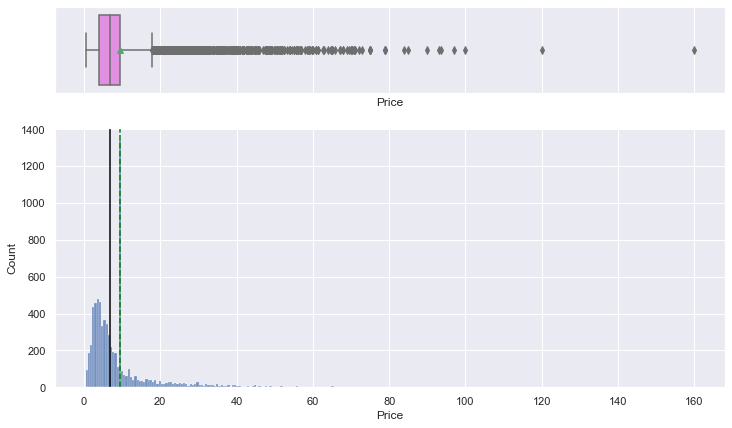

In [58]:
histogram_boxplot(df, "Price")

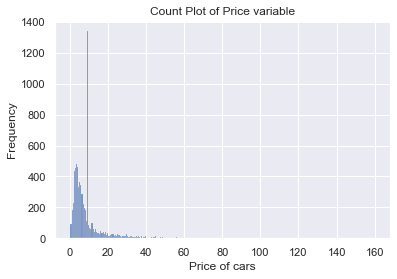

In [43]:
# display a plot showing the frequency of each day in the tips data

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data= df, x= "Price")
plt.xlabel('Seats of cars')
plt.ylabel('Frequency')
plt.title('Count Plot of Price variable')
plt.show()




Output Variable is skew data need to be normal distributed

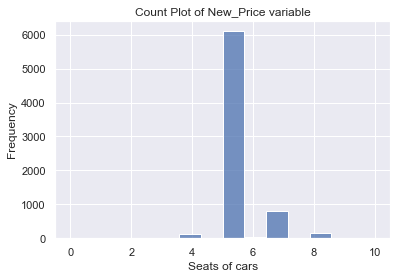

In [45]:
sns.histplot(data= df, x= "Seats")
plt.xlabel('Seats of cars')
plt.ylabel('Frequency')
plt.title('Count Plot of New_Price variable')
plt.show()


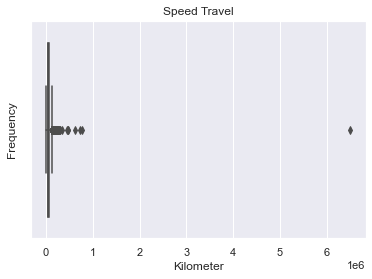

In [47]:
sns.boxplot(data=df,x="Kilometers_Driven")
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.title('Speed Travel')
plt.show()


# Bivariate Analysis

Speed travel for input variable is skewed and high number of outlier


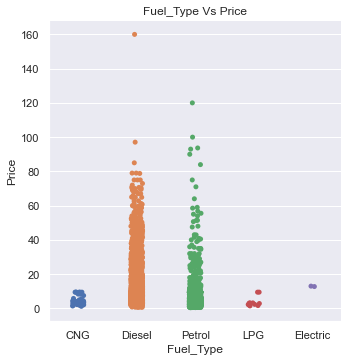

In [52]:
sns.catplot(data=df,x="Fuel_Type",y="Price")
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.title('Fuel_Type Vs Price')
plt.show()

Diesel and Petrol have the highest Price 

In [50]:
df.drop(["S.No.","Name","Owner_Type",],axis=1,inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Mileage            7253 non-null   object 
 6   Engine             7253 non-null   object 
 7   Power              7253 non-null   object 
 8   Seats              7253 non-null   float64
 9   New_Price          7253 non-null   float64
 10  Price              7253 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 623.4+ KB


# Bivariate Analysis

Let check the correlation between the numeric variable

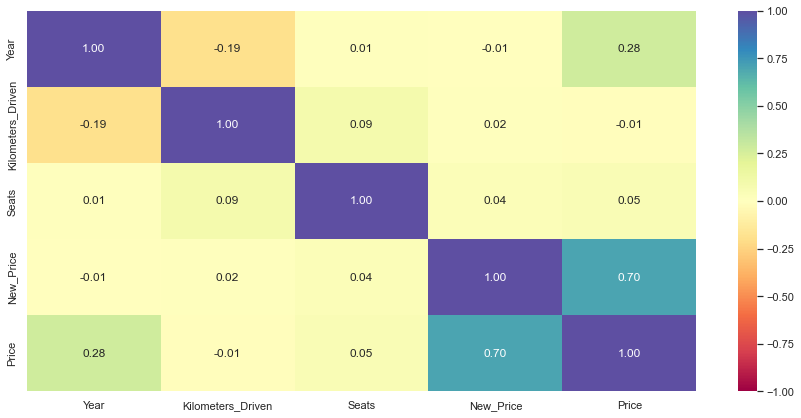

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Linear Model Building
We want to predict the price.

Before we proceed to build a model, we'll have to encode categorical features.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check it's performance.

In [62]:
# defining the dependent and independent variables
X = df.drop(["Price"], axis=1)
y = df["Price"]

In [63]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Year,Kilometers_Driven,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Mileage_0.0 kmpl,Mileage_10.0 kmpl,Mileage_10.1 kmpl,Mileage_10.13 kmpl,Mileage_10.2 kmpl,Mileage_10.37 kmpl,Mileage_10.4 kmpl,Mileage_10.5 kmpl,Mileage_10.6 kmpl,Mileage_10.8 kmpl,Mileage_10.9 kmpl,Mileage_10.91 kmpl,Mileage_10.93 kmpl,Mileage_10.98 kmpl,Mileage_11.0 kmpl,Mileage_11.05 kmpl,Mileage_11.07 kmpl,Mileage_11.1 kmpl,Mileage_11.18 kmpl,Mileage_11.2 kmpl,Mileage_11.25 kmpl,Mileage_11.3 kmpl,Mileage_11.33 kmpl,Mileage_11.36 kmpl,Mileage_11.4 kmpl,Mileage_11.49 kmpl,Mileage_11.5 kmpl,Mileage_11.56 kmpl,Mileage_11.57 kmpl,Mileage_11.62 kmpl,Mileage_11.68 kmpl,Mileage_11.7 kmpl,Mileage_11.72 kmpl,Mileage_11.74 kmpl,Mileage_11.78 kmpl,Mileage_11.79 kmpl,Mileage_11.8 kmpl,Mileage_11.88 km/kg,Mileage_11.9 kmpl,Mileage_12.0 kmpl,Mileage_12.05 kmpl,Mileage_12.07 kmpl,Mileage_12.08 kmpl,Mileage_12.1 kmpl,Mileage_12.19 kmpl,Mileage_12.2 kmpl,Mileage_12.3 kmpl,Mileage_12.35 kmpl,Mileage_12.37 kmpl,Mileage_12.39 kmpl,Mileage_12.4 kmpl,Mileage_12.5 kmpl,Mileage_12.51 kmpl,Mileage_12.55 kmpl,Mileage_12.6 kmpl,Mileage_12.62 kmpl,Mileage_12.63 kmpl,Mileage_12.65 kmpl,Mileage_12.7 kmpl,Mileage_12.8 kmpl,Mileage_12.81 kmpl,Mileage_12.83 kmpl,Mileage_12.85 kmpl,Mileage_12.9 kmpl,Mileage_12.95 kmpl,Mileage_12.97 kmpl,Mileage_12.98 kmpl,Mileage_12.99 kmpl,Mileage_13.0 kmpl,Mileage_13.01 kmpl,Mileage_13.06 kmpl,Mileage_13.07 kmpl,Mileage_13.1 kmpl,Mileage_13.14 kmpl,Mileage_13.17 kmpl,Mileage_13.2 km/kg,Mileage_13.2 kmpl,Mileage_13.22 kmpl,Mileage_13.24 kmpl,Mileage_13.29 kmpl,Mileage_13.33 kmpl,Mileage_13.4 kmpl,Mileage_13.44 kmpl,Mileage_13.45 km/kg,Mileage_13.49 kmpl,Mileage_13.5 kmpl,Mileage_13.53 kmpl,Mileage_13.58 kmpl,Mileage_13.6 kmpl,Mileage_13.68 kmpl,Mileage_13.7 kmpl,Mileage_13.73 kmpl,Mileage_13.8 kmpl,Mileage_13.9 kmpl,Mileage_13.93 kmpl,Mileage_14.0 kmpl,Mileage_14.02 kmpl,Mileage_14.07 kmpl,Mileage_14.1 kmpl,Mileage_14.16 kmpl,Mileage_14.2 kmpl,Mileage_14.21 kmpl,Mileage_14.24 kmpl,Mileage_14.28 kmpl,Mileage_14.3 kmpl,Mileage_14.33 kmpl,Mileage_14.39 kmpl,Mileage_14.4 kmpl,Mileage_14.42 kmpl,Mileage_14.45 kmpl,Mileage_14.47 kmpl,Mileage_14.49 kmpl,Mileage_14.5 kmpl,Mileage_14.53 km/kg,Mileage_14.53 kmpl,Mileage_14.57 kmpl,Mileage_14.59 kmpl,Mileage_14.6 kmpl,Mileage_14.62 kmpl,Mileage_14.66 kmpl,Mileage_14.67 kmpl,Mileage_14.69 kmpl,Mileage_14.7 kmpl,Mileage_14.74 kmpl,Mileage_14.75 kmpl,Mileage_14.8 kmpl,Mileage_14.81 kmpl,Mileage_14.83 kmpl,Mileage_14.84 kmpl,Mileage_14.9 kmpl,Mileage_14.94 kmpl,Mileage_14.95 kmpl,Mileage_15.0 kmpl,Mileage_15.04 kmpl,Mileage_15.06 kmpl,Mileage_15.1 km/kg,Mileage_15.1 kmpl,Mileage_15.11 kmpl,Mileage_15.15 kmpl,Mileage_15.17 kmpl,Mileage_15.2 kmpl,Mileage_15.26 kmpl,Mileage_15.29 kmpl,Mileage_15.3 kmpl,Mileage_15.4 kmpl,Mileage_15.41 kmpl,Mileage_15.42 kmpl,Mileage_15.5 kmpl,Mileage_15.56 kmpl,Mileage_15.6 kmpl,Mileage_15.63 kmpl,Mileage_15.64 kmpl,Mileage_15.68 kmpl,Mileage_15.7 kmpl,Mileage_15.73 kmpl,Mileage_15.74 kmpl,Mileage_15.8 kmpl,Mileage_15.85 kmpl,Mileage_15.87 kmpl,Mileage_15.9 kmpl,Mileage_15.96 kmpl,Mileage_15.97 kmpl,Mileage_16.0 kmpl,Mileage_16.02 kmpl,Mileage_16.05 kmpl,Mileage_16.07 kmpl,Mileage_16.09 kmpl,Mileage_16.1 kmpl,Mileage_16.12 kmpl,Mileage_16.2 kmpl,Mileage_16.25 kmpl,Mileage_16.3 kmpl,Mileage_16.36 kmpl,Mileage_16.38 kmpl,Mileage_16.4 kmpl,Mileage_16.46 kmpl,Mileage_16.47 kmpl,Mileage_16.5 kmpl,Mileage_16.51 kmpl,Mileage_16.52 kmpl,Mileage_16.55 kmpl,Mileage_16.6 kmpl,Mileage_16.7 kmpl,Mileage_16.73 kmpl,Mileage_16.77 kmpl,Mileage_16.78 kmpl,Mileage_16.8 kmpl,Mileage_16.82 kmpl,Mileage_16.9 kmpl,Mileage_16.93 kmpl,Mileage_16.95 kmpl,Mileage_16.96 kmpl,Mileage_16.98 kmpl,Mileage_17.0 km/kg,Mileage_17.0 kmpl,Mileage_17.01 kmpl,Mileage_17.05 kmpl,Mileage_17.06 kmpl,Mileage_1

In [64]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [65]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


In [66]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

# Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and  𝑅2 .

We will define a function to calculate MAPE and adjusted  𝑅2 .

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

In [67]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [68]:
# Checking model performance on train set
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.884731,2.215574,0.847352,0.809808,32.71222


In [69]:
# Checking model performance on test set
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.473856e+07,1.752915e+06,-1.045159e+13,-1.937956e+13,1.809483e+07


# Observations

Root Mean Squared Error of train and test data is somewhat similar.
Mean Absolute Error indicates that our current model is able to predict the price within mean error of 0.2 on test data.
The units of both RMSE and MAE are the same.
Mean Absolute Percentage Error is ~8.5% on the test data.

# Forward Feature Selection
Let us try using forward feature selection on the data to check if we can get a good model performance using a lesser number of features.

In [70]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

ModuleNotFoundError: No module named 'mlxtend'

In [71]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=7,
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

NameError: name 'SFS' is not defined

# Insights
With our linear regression model we have been able to capture ~30% of the variation in our data.
From the Analysis, Features like Year,  Mileage, and  Fuel_Type will tend to increase  price and features like Mileage and Year will tend to decrease the price of second hand car.

# Business Recommendations
Our final linear regression model has a MAPE of 8.4% on the test data, which means that we are able to predict within 8.3% of the  price.
Given more time Comprehensive and rigorous should be conducted on input variable such as kilometer_driven, Mileage and Fuel_Type on relationship between Price new car and second hand car